# **INTELIGENCIA DEL NEGOCIO / Business Intelligence**
## **ASSIGNMENT A2 - CONVOLUTIONAL NEURAL NETWORKS**

**INSTRUCCIONES / RECOMENDACIONES**

- Se recomienda leer con detalle la descripción de cada una de las celdas.
- Las celdas que ya tienen código, se deberán ejecutar directamente.
- Las celdas que están vacías, se completarán con la implementación requerida en el notebook.
- No se incluirán más celdas de las establecidas en el presente notebook, por lo que la solución al mismo deberá implementarse exclusivamente en las celdas vacías.
- Scikit-Learn es un paquete muy útil para las operaciones de preprocesamiento de los datos, como estandarización, normalización, codificación, etc.
- Recuerda poner nombre a todas las layers de Keras, facilitará mucho las cosas a la hora de depurar errores.
- Si ves que un apartado es complejo, intenta escribir y ejecutarlo de forma simplificada (por ejemplo, con menos layers o con menos features) y después vaya amplíandolo.
- La entrega se realizará vía Moodle. Será necesario subir la solución a este notebook con el nombre: **NOMBRE_GRUPO.ipynb**

- **Fecha de Publicación: 19/02/2024**
- **Fecha de Entrega: 25/02/2024**
- **Test: 26/02/2024**


# Carga de librerías


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

print("TF VERSION: ", tf.__version__)

TF VERSION:  2.15.0


# Carga dataset

Se utilizará un dataset de imágenes sobre señales de tráfico, para la construcción de un clasificador multiclase.

El dataset está contenido en el fichero: **traffic-sign.zip**

https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip /content/drive/MyDrive/data/traffic-sign.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: traffic-sign/5/00005_00044_00011.png  
  inflating: traffic-sign/5/00005_00044_00013.png  
  inflating: traffic-sign/5/00005_00044_00014.png  
  inflating: traffic-sign/5/00005_00044_00015.png  
  inflating: traffic-sign/5/00005_00044_00019.png  
  inflating: traffic-sign/5/00005_00044_00020.png  
  inflating: traffic-sign/5/00005_00044_00021.png  
  inflating: traffic-sign/5/00005_00044_00022.png  
  inflating: traffic-sign/5/00005_00044_00026.png  
  inflating: traffic-sign/5/00005_00044_00027.png  
  inflating: traffic-sign/5/00005_00044_00029.png  
  inflating: traffic-sign/5/00005_00045_00002.png  
  inflating: traffic-sign/5/00005_00045_00003.png  
  inflating: traffic-sign/5/00005_00045_00004.png  
  inflating: traffic-sign/5/00005_00045_00005.png  
  inflating: traffic-sign/5/00005_00045_00006.png  
  inflating: traffic-sign/5/00005_00045_00007.png  
  inflating: traffic-sign/5/00005_00045_00010.png  
  i

In [ ]:
import os.path

num_classes = 20

path = '/content/traffic-sign/'

for i in range(num_classes):
  path_aux = path + str(i)
  num_files = len([f for f in os.listdir(path_aux)
                  if os.path.isfile(os.path.join(path_aux, f))])
  print ("Class " + str(i) + " -> " + str(num_files) + " images")

Class 0 -> 210 images
Class 1 -> 2220 images
Class 2 -> 2250 images
Class 3 -> 1410 images
Class 4 -> 1980 images
Class 5 -> 1860 images
Class 6 -> 420 images
Class 7 -> 1440 images
Class 8 -> 1410 images
Class 9 -> 1470 images
Class 10 -> 2010 images
Class 11 -> 1320 images
Class 12 -> 2100 images
Class 13 -> 2160 images
Class 14 -> 780 images
Class 15 -> 630 images
Class 16 -> 420 images
Class 17 -> 1110 images
Class 18 -> 1200 images
Class 19 -> 210 images


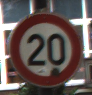

In [ ]:
path_aux = path + '0'
signal = [f for f in os.listdir(path_aux)]

PIL.Image.open(path_aux+'/'+str(signal[20]))

# Preparación de datasets

Divida el dataset original de señales de tráfico en train, validation y test.

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 26610 files belonging to 20 classes.
Using 21288 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 26610 files belonging to 20 classes.
Using 5322 files for validation.


In [ ]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take(val_batches // 5)
val_ds = val_ds.skip(val_batches // 5)

print('Number of train batches: %d' % tf.data.experimental.cardinality(train_ds))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_ds))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_ds))

Number of train batches: 666
Number of validation batches: 134
Number of test batches: 33


In [ ]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '3', '4', '5', '6', '7', '8', '9']


# Visualizar los datos

Mostrar una muestra representativa de las imágenes contenidas dentro del dataset de entrenamiento.

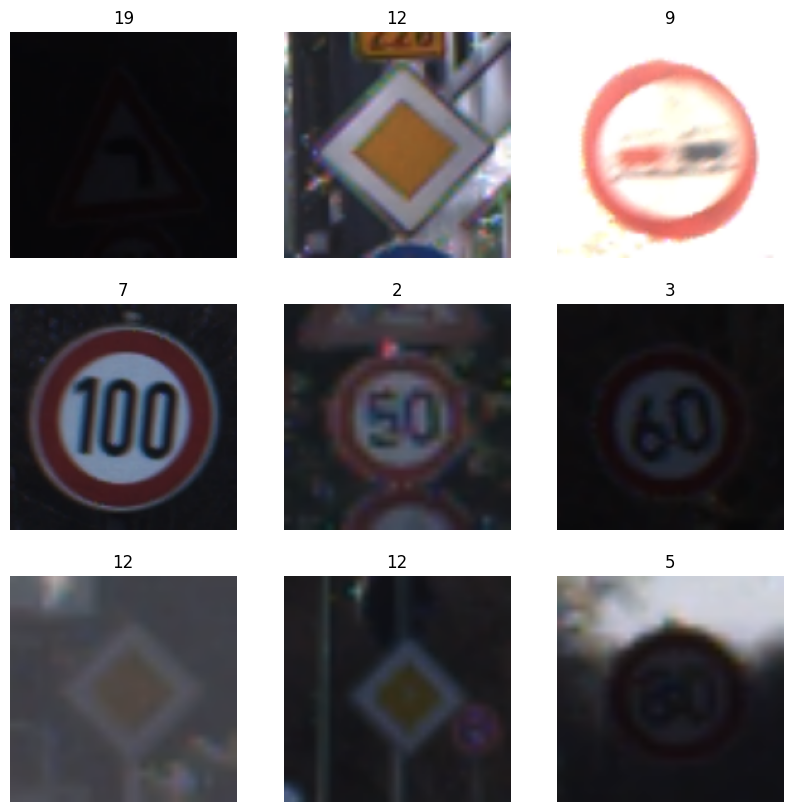

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


# Activar la cache para la carga de imágenes durante el entrenamiento y la verificación de rendimiento

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Modelo Deep Learning basado en CNN

Construya un modelo CNN para la clasificación de las señales de tráfico a partir del dataset.

Utilice algunas de las técnicas de regularización para evitar el overfitting del modelo siempre que sea necesario.

In [ ]:
normalization_layer = layers.Rescaling(1./255)

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

## Compilación del modelo
Compile el modelo con Adam como función de optimización. Elija la función de pérdida acorde con el objetivo del modelo CNN

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Entrenamiento

Seleccionar el tamaño del batch y el número de epochs necesarios.

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
666/666 [==============================] - 44s 36ms/step - loss: 0.7121 - accuracy: 0.7857 - val_loss: 0.2768 - val_accuracy: 0.9219
Epoch 2/10
666/666 [==============================] - 18s 27ms/step - loss: 0.1788 - accuracy: 0.9478 - val_loss: 0.1540 - val_accuracy: 0.9569
Epoch 3/10
666/666 [==============================] - 18s 27ms/step - loss: 0.1077 - accuracy: 0.9675 - val_loss: 0.1038 - val_accuracy: 0.9700
Epoch 4/10
666/666 [==============================] - 18s 28ms/step - loss: 0.0761 - accuracy: 0.9756 - val_loss: 0.0975 - val_accuracy: 0.9754
Epoch 5/10
666/666 [==============================] - 19s 28ms/step - loss: 0.0720 - accuracy: 0.9788 - val_loss: 0.0763 - val_accuracy: 0.9831
Epoch 6/10
666/666 [==============================] - 18s 27ms/step - loss: 0.0512 - accuracy: 0.9836 - val_loss: 0.0728 - val_accuracy: 0.9798
Epoch 7/10
666/666 [==============================] - 18s 27ms/step - loss: 0.0483 - accuracy: 0.9861 - val_loss: 0.0895 - val_accuracy:

## Mostrar los resultados del entrenamiento
El método fit devuelve un objeto de tipo history con las métricas obtenidas durante el entrenamiento. Analice el resultado de ejecutar 'history.history' y dibuje las métricas en las distintas épocas.

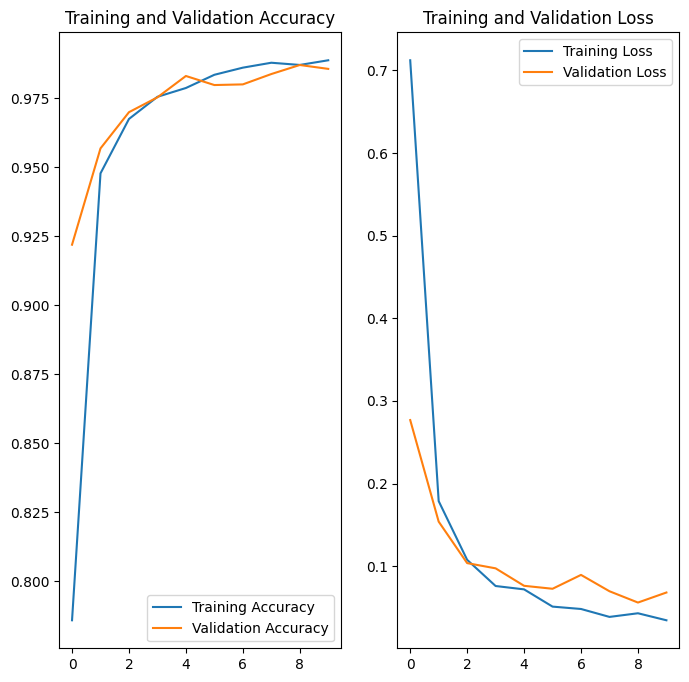

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluación

Utilice el dataset de test para verificar el rendimiento del modelo creado.

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)

33/33 [==============================] - 2s 45ms/step - loss: 0.0593 - accuracy: 0.9848
Test accuracy : 0.9848484992980957


Predictions:
 [12 18  5 12  3 18 17  5 12  2 10 15 15 17 10 15 19  9 14  5 15  1  2  1
  5 17  5  5  3  4 14 10]
Labels:
 [12 18  5 12  3 18 17 15 12  2 10 15 15 17 10 15 19  9 14  5 15  1  2  1
  5 17  5  5  3  4 14 10]


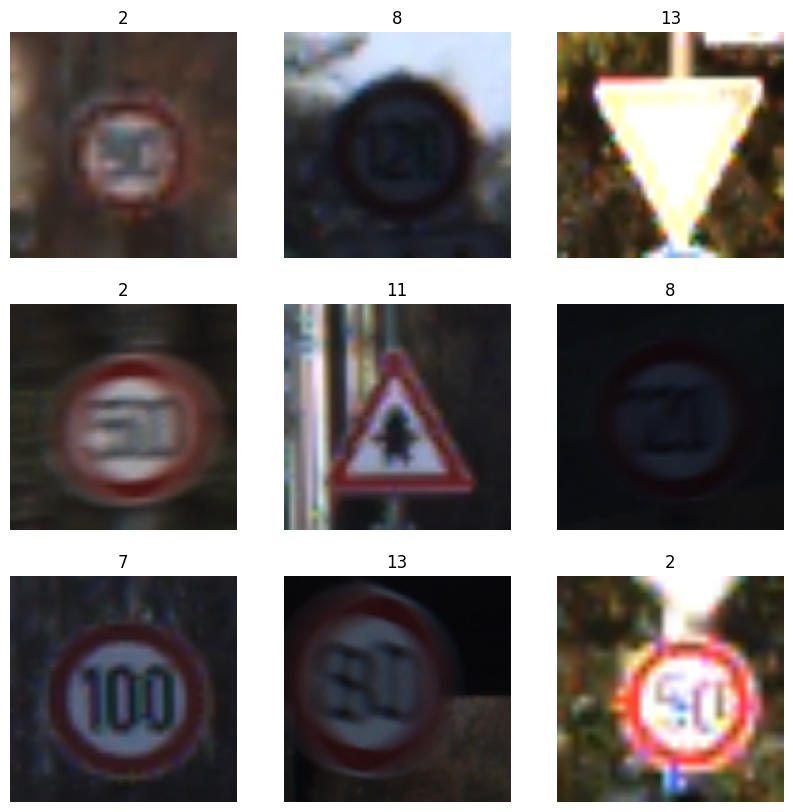

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch) #.flatten()

predictions = tf.nn.softmax(predictions)
predictions = tf.math.argmax(predictions, axis=1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[(predictions[i])])
  plt.axis("off")

# Modelo CNN aplicando Transfer Learning

En base al mismo dataset de señales de tráfico, construir un segundo modelo CNN empleando técnicas de Transfer Learning, con el objetivo de mejorar su rendimiento.

Se deberá utilizar como modelo base, cualquiera de los modelos existentes en el TF Hub (https://www.kaggle.com/models)

Nota: evaluar las dimensiones del modelo base, ya que si es demasiado grande, podría llegar a existir un problema de falta de recursos dentro de Colab.


In [ ]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SIZE = (180, 180)

IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False
base_model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 90, 90, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 90, 90, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReL

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 6, 6, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 20)                25620     
                                                                 
Total params: 2283604 (8.71 MB)
Trainable params: 25620 (10

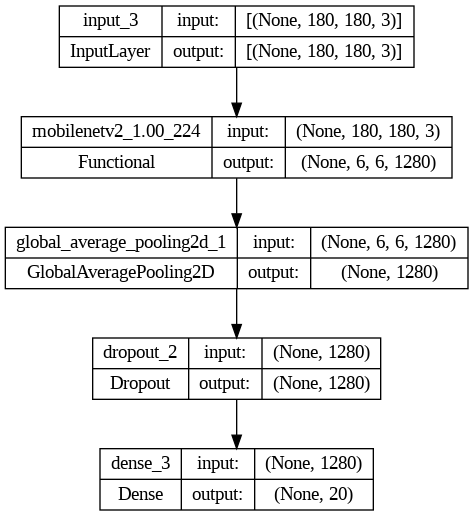

In [ ]:
inputs = tf.keras.Input(shape=(180, 180, 3))
#x = data_augmentation(inputs)
#x = preprocess_input(x)
#x = base_model(x, training=False)
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(num_classes)(x)
model2 = tf.keras.Model(inputs, outputs)

model2.summary()
tf.keras.utils.plot_model(model2, show_shapes=True)

## Compilación del modelo

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Entrenamiento

In [ ]:
epochs=10
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
666/666 [==============================] - 73s 101ms/step - loss: 1.5856 - accuracy: 0.4848 - val_loss: 1.1686 - val_accuracy: 0.6120
Epoch 2/10
666/666 [==============================] - 35s 51ms/step - loss: 1.1156 - accuracy: 0.6278 - val_loss: 0.9989 - val_accuracy: 0.6671
Epoch 3/10
666/666 [==============================] - 25s 38ms/step - loss: 0.9857 - accuracy: 0.6672 - val_loss: 0.9084 - val_accuracy: 0.7014
Epoch 4/10
666/666 [==============================] - 25s 38ms/step - loss: 0.9281 - accuracy: 0.6828 - val_loss: 0.8709 - val_accuracy: 0.7096
Epoch 5/10
666/666 [==============================] - 24s 35ms/step - loss: 0.8819 - accuracy: 0.6976 - val_loss: 0.8660 - val_accuracy: 0.7121
Epoch 6/10
666/666 [==============================] - 24s 36ms/step - loss: 0.8474 - accuracy: 0.7107 - val_loss: 0.8126 - val_accuracy: 0.7255
Epoch 7/10
666/666 [==============================] - 24s 36ms/step - loss: 0.8235 - accuracy: 0.7175 - val_loss: 0.8086 - val_accuracy

## Mostrar los resultados del entrenamiento

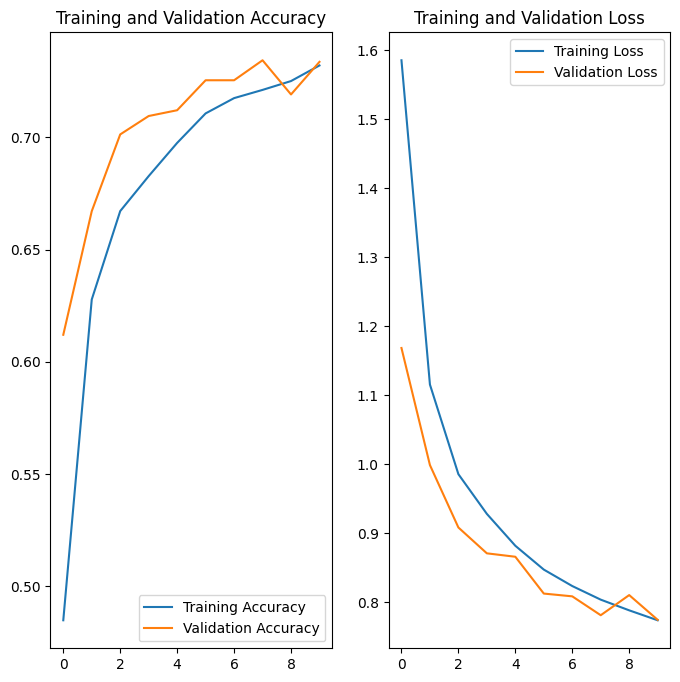

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluación

In [ ]:
loss, accuracy = model2.evaluate(test_ds)
print('Test accuracy :', accuracy)

33/33 [==============================] - 1s 31ms/step - loss: 0.8061 - accuracy: 0.7311
Test accuracy : 0.7310606241226196


Predictions:
 [17 18  5  1 10 18 17 18 10  2 10 15 17 17 10 17 19  9 14  5 15  1  2  1
  5 17  5  5  3  4  1 10]
Labels:
 [12 18  5 12  3 18 17 15 12  2 10 15 15 17 10 15 19  9 14  5 15  1  2  1
  5 17  5  5  3  4 14 10]


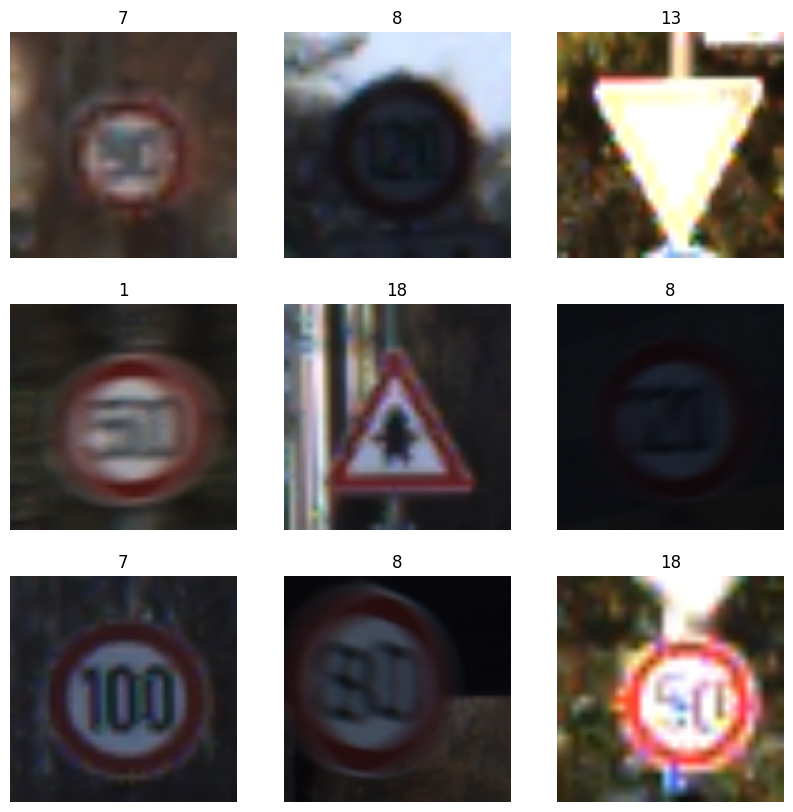

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model2.predict_on_batch(image_batch) #.flatten()

predictions = tf.nn.softmax(predictions)
predictions = tf.math.argmax(predictions, axis=1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[(predictions[i])])
  plt.axis("off")

# Conclusiones del estudio

Detallar las principales conclusiones extraidas sobre la construcción del modelo CNN, la aplicación de las técnicas de transfer learning, y la comparativa entre ambos.

*Escribir AQUI las conclusiones*